In [5]:
import numpy as np
import h5py

with h5py.File('/data/users/kyle/Mishas_Data/M83_stokes_h5/20features.h5', 'r') as f:
    features = f['.']['features'].value
with h5py.File('/data/users/kyle/Mishas_Data/M83_stokes_h5/orig_flag.h5', 'r') as f:
    y  = f['.']['labels'].value

# Min Max

In [6]:
features.shape

(1100000, 20, 21)

In [9]:
from sklearn.preprocessing import MinMaxScaler

min_max = np.empty(features.shape)
scaler = MinMaxScaler()
for i in range(21):
    min_max[:,:,i] = scaler.fit_transform(features[:,:,i])


In [10]:
with h5py.File('/data/users/kyle/Mishas_Data/M83_stokes_h5/min_max.h5', 'r') as f:
    x = f['.']['features'].value

In [11]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(x[:,:,0], min_max[:,:,0])

In [18]:
min_max[:,0,0]

array([0.49502196, 0.49518917, 0.49542262, ..., 0.49692016, 0.49722608,
       0.49639765])

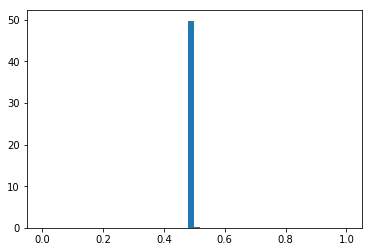

In [17]:
import matplotlib.pyplot as plt

plt.hist(min_max[:,0,0].flatten(), 50, density=True)
plt.show()

In [4]:
import h5py
with h5py.File('/data/users/kyle/Mishas_Data/M83_stokes_h5/min_max.h5', 'w') as f:
#     grp = f.create_group("features")
    f.create_dataset("features", data = min_max)


In [34]:
mags = np.empty((min_max.shape[0], 5, 21))
for i in range(21):
    counter = 0
    for j in range(2,18,4):
        mags[:,counter,i] = min_max[:,j,i]
        counter = counter +1
    mags[:,4,i] = min_max[:,15,i]


In [35]:
import h5py
with h5py.File('/data/users/kyle/Mishas_Data/M83_stokes_h5/4_feat_min_max.h5', 'w') as f:
#     grp = f.create_group("features")
    f.create_dataset("features", data = mags)


# Standardization

In [2]:
from sklearn.preprocessing import StandardScaler

standard = np.empty(features.shape)
stand = StandardScaler()
for i in range(21):
    standard[:,:,i] = stand.fit_transform(features[:,:,i])


In [21]:
x = standard.transpose(2,0,1).reshape(-1,standard.shape[1])
y = y.flatten(order='F')

In [22]:
x.shape

(23100000, 20)

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(x)


In [31]:
X_pca.shape

(23100000, 10)

In [28]:
import matplotlib.pyplot as plt
import matplotlib

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(311)
ax1.scatter(X_pca[:,0],X_pca[:,1],c=y)

ax2 = fig.add_subplot(312)
ax2.scatter(X_pca[:,0],X_pca[:,2],c=y)

ax3 = fig.add_subplot(313)
ax3.scatter(X_pca[:,0],X_pca[:,3],c=y)

plt.show()

KeyboardInterrupt: 

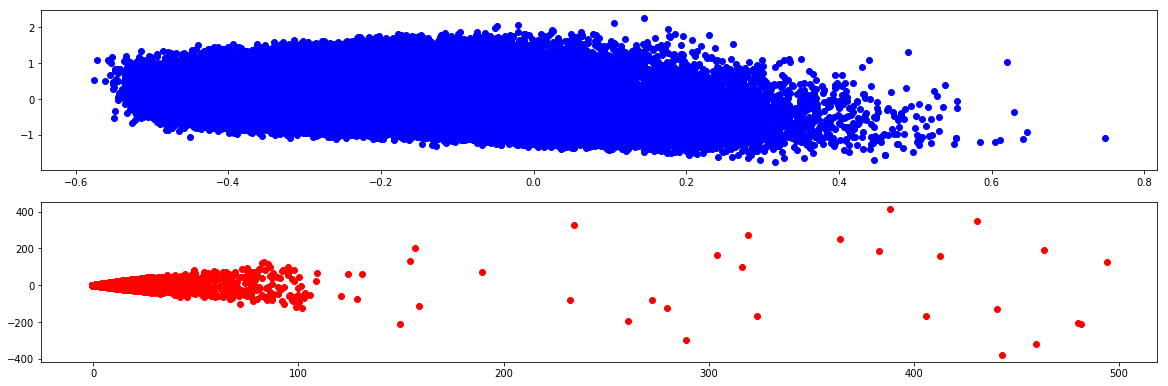

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(311)
ax1.scatter(X_pca[ast,0],X_pca[ast,1],c='blue')

ax2 = fig.add_subplot(312)
ax2.scatter(X_pca[rfi,0],X_pca[rfi,1],c='red')


plt.show()

In [10]:
ast = y[:,0] == 0
rfi = y[:,0] == 1

In [32]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_pca)


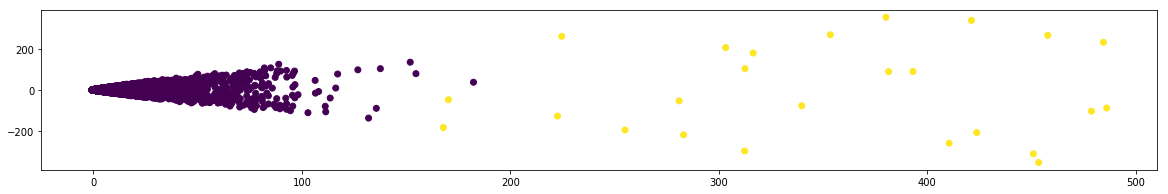

In [34]:
import matplotlib.pyplot as plt
import matplotlib

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(311)
ax1.scatter(X_pca[:5000*200,0],X_pca[:5000*200,1],c=kmeans.labels_[:5000*200])

# ax2 = fig.add_subplot(312)
# ax2.scatter(X_pca[:,0],X_pca[:,2],c=y[:,0])

# ax3 = fig.add_subplot(313)
# ax3.scatter(X_pca[:,0],X_pca[:,3],c=y[:,0])

plt.show()

# Unit Normal

In [120]:
from sklearn.preprocessing import Normalizer

normal = np.empty(features.shape)
normalizer = Normalizer()
for i in range(21):
    normal[:,:,i] = normalizer.fit_transform(features[:,:,i])


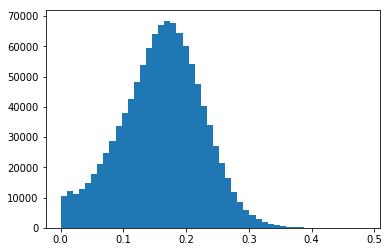

In [122]:
plt.hist(normal[:,2,0].flatten(), 50)
plt.show()

# Quantile Transform

In [20]:
from sklearn.preprocessing import quantile_transform

quant = np.empty(features.shape)

for i in range(21):
    quant[:,:,i] = quantile_transform(features[:,:,i], n_quantiles=10, random_state=0)


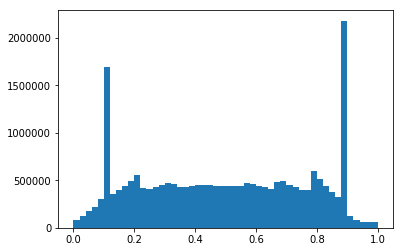

In [127]:
plt.hist(quant[:,:,0].flatten(), 50)
plt.show()

In [24]:
%%time
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(quant[:,:,0])


CPU times: user 27.9 s, sys: 40.7 s, total: 1min 8s
Wall time: 7.24 s


In [22]:
ast = y[:,0] == 0
rfi = y[:,0] == 1

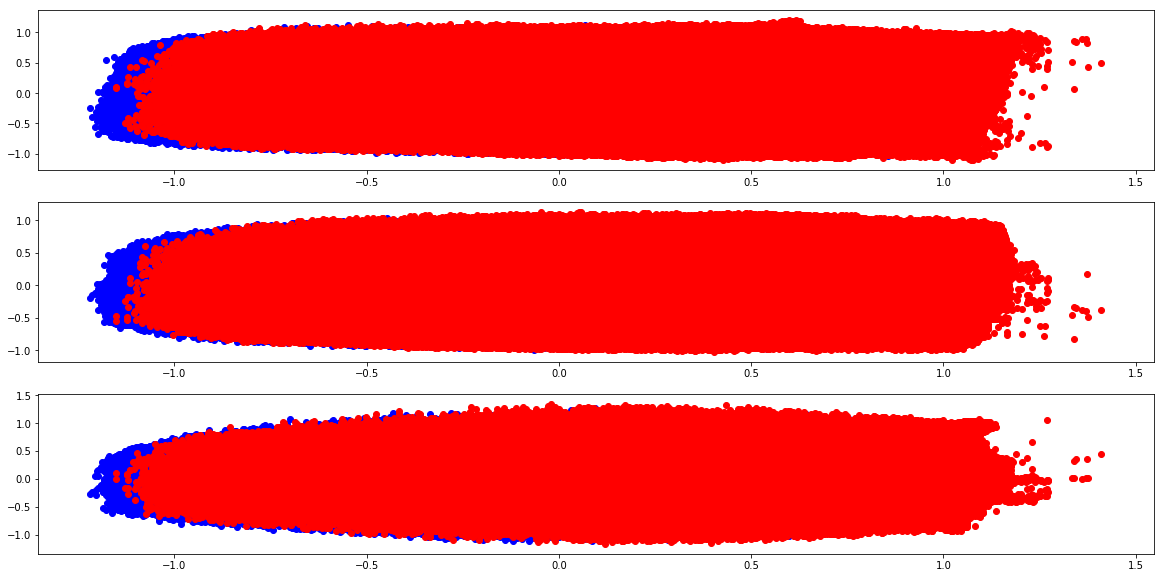

In [26]:
import matplotlib.pyplot as plt
plt
plt

plt.show()

import matplotlib.pyplot as plt
import matplotlib

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(311)
ax1.scatter(X_pca[ast,0],X_pca[ast,1],c='blue')
ax1.scatter(X_pca[rfi,0],X_pca[rfi,1],c='red')

ax2 = fig.add_subplot(312)
ax2.scatter(X_pca[ast,0],X_pca[ast,2],c='blue')
ax2.scatter(X_pca[rfi,0],X_pca[rfi,2],c='red')

ax3 = fig.add_subplot(313)
ax3.scatter(X_pca[ast,0],X_pca[ast,3],c='blue')
ax3.scatter(X_pca[rfi,0],X_pca[rfi,3],c='red')

plt.show()

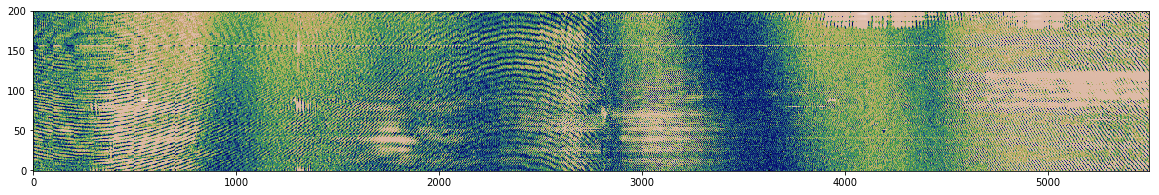

In [129]:
import matplotlib.pyplot as plt
import matplotlib

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(311)
im1 = ax1.imshow(np.transpose(quant[:,2,0].reshape(5500,200)), aspect="auto", cmap="gist_earth")
plt.gca().invert_yaxis()
plt.show()

In [130]:
import h5py
with h5py.File('/data/users/kyle/Mishas_Data/M83_stokes_h5/quant.h5', 'w') as f:
#     grp = f.create_group("features")
    f.create_dataset("features", data = features)


# Mod Z

In [5]:
def mod_z(ys):
    threshold = 3.5

    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    return np.asarray(np.abs(modified_z_scores) > threshold)


In [6]:
labels = mod_z(features[:,2,0])

In [17]:
features[labels,2,0] = np.median(features[np.invert(labels),2,0])

In [18]:
norm = features[:,2,0]/np.max(features[:,2,0])

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(features[:,2,0].reshape(-1,1))

In [21]:
norm.shape

(1100000,)

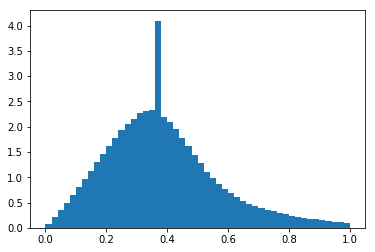

In [20]:
plt.hist(norm,50,density=True)
plt.show()

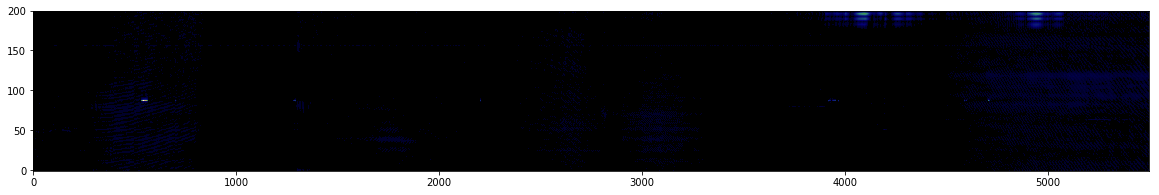

In [11]:
import matplotlib.pyplot as plt
import matplotlib

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(311)
im1 = ax1.imshow(np.transpose(x.reshape(5500,200)), aspect="auto", cmap="gist_earth", norm=matplotlib.colors.LogNorm())
plt.gca().invert_yaxis()
plt.show()

# Plot outlier count

In [98]:
def z(ys):
    threshold = 3.5

    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    return np.where(np.abs(modified_z_scores) > threshold)

In [99]:
a = z(features[:,2,0])

In [100]:
zs = []
for i in range(21):
#     for j in range(20):
    zs.append(len(z(features[:,2,i])[0]))

KeyboardInterrupt: 

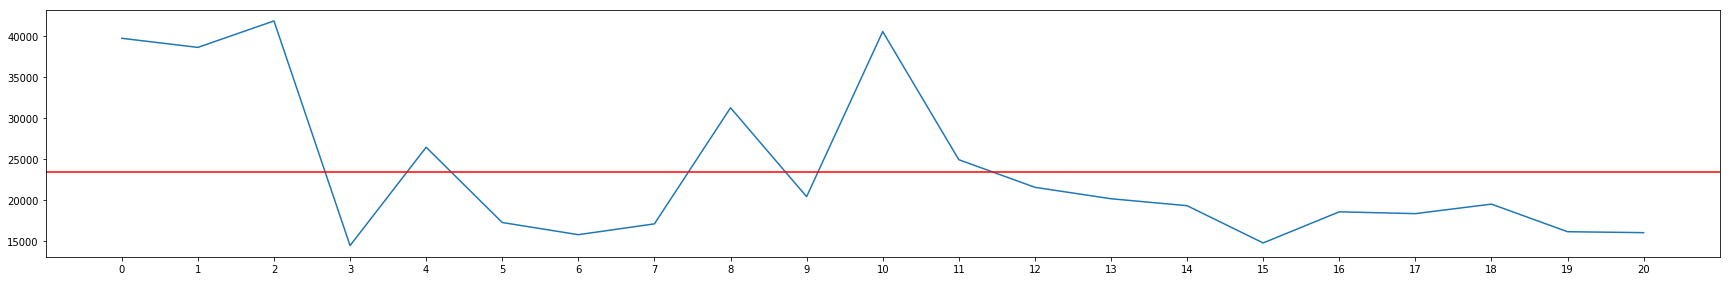

In [46]:
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(211)
ax.plot(np.arange(21), zs)
ax.axhline(np.mean(zs), color="red")

ax.set_xticks(np.arange(0,21))
plt.show()

In [ ]:
3
4
6
7
12
13?
14
18

# Av of feat

In [101]:
def z(ys):
    threshold = 3.5

    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    return np.where(np.abs(modified_z_scores) > threshold)

In [107]:
z_s = np.empty([20,21])
for i in range(20):
    for j in range(21):
        z_s[i,j] = (len(z(features[:,i,j])[0]))


In [109]:
z_s.shape

(20, 21)

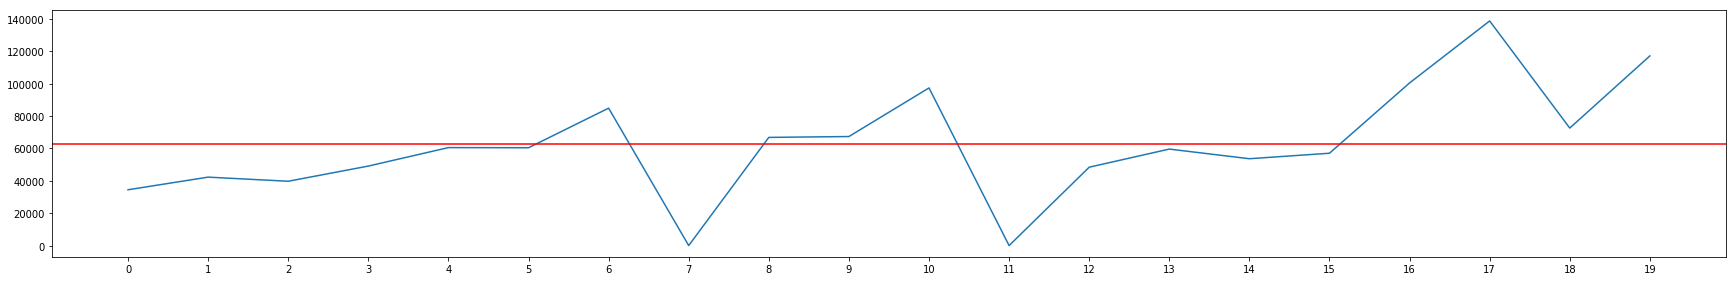

In [111]:
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(211)
ax.plot(np.arange(20), z_s[:,0])
ax.axhline(np.mean(z_s[:,0]), color="red")

ax.set_xticks(np.arange(0,20))
plt.show()